"Abgabe: Public URL und Screenshot des Schemas, ein File zum Vergleich(zB Excel) und ein Exportfile des Ergebnissses
Naming Convention beachten!
FN_Klasse_MockSchueler01"

No, we don't use excel for this

In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(Path('out', 'Wolf_4EHIF_MockSchueler01.csv'))
df = df.dropna()
df

,id,first_name,last_name,gender,birthday,class_1,birthday_adjusted_for_ex_7,class_2,spg_id_c1,avg_grade
0,0,Michael,HALE,maennlich,2007-10-27,1EHIF,2008-11-13,5BHBGM,HAL222281,2.986437
1,1,Julie,LAWSON,weiblich,2003-01-25,2EHIF,2007-06-01,4AHKUI,LAW210705,3.651143
2,2,Tristan,ROWE,maennlich,2002-09-22,1EHIF,2008-01-15,5AFIT,ROW227047,3.817739
3,3,Paula,DIAZ,weiblich,2005-08-18,4CHIF,2004-09-08,1AHBGM,DIA194687,4.175555
4,4,Sara,KIM,weiblich,2008-05-04,2AHIF,2006-05-14,2AFIT,KIM216744,4.194078
...,...,...,...,...,...,...,...,...,...,...
9995,9995,Cassie,GUTIERREZ,offen,2005-12-10,1AHIF,2007-04-13,3AHKUI,GUT220041,3.217124
9996,9996,David,PATEL,divers,2006-08-08,3EHIF,2006-04-30,1AHKUI,PAT206390,4.037806
9997,9997,Jorge,SNYDER,maennlich,2002-07-14,4AHIF,2005-06-25,2CHBGM,SNY195879,4.538946
9998,9998,Tammie,PACE,offen,2008-07-31,2AHIF,2006-05-11,5AFIT,PAC211595,3.414334


In [4]:
HIF_idxs = df['class_2'].str.contains('HIF')
FIT_idxs = df['class_2'].str.contains('FIT')
HKUI_idxs = df['class_2'].str.contains('HKUI')
HBGM_idxs = df['class_2'].str.contains('HBGM')
df.loc[HIF_idxs]

,id,first_name,last_name,gender,birthday,class_1,birthday_adjusted_for_ex_7,class_2,spg_id_c1,avg_grade
8,8,Belinda,HUDSON,inter,2005-10-18,2AHIF,2006-05-13,1BHIF,HUD218008,2.129408
10,10,Matthew,KENT,maennlich,2003-09-01,2AHIF,2006-05-03,2BHIF,KEN212375,1.548431
11,11,Christopher,GREENE,maennlich,2004-09-25,1AHIF,2007-07-03,2AHIF,GRE223012,1.171330
16,16,Adam,LAWRENCE,maennlich,2007-11-08,1AHIF,2008-09-16,4BHIF,LAW224502,3.666317
18,18,Shelley,SANCHEZ,weiblich,2008-06-25,2BHIF,2007-08-30,2AHIF,SAN214905,2.277690
...,...,...,...,...,...,...,...,...,...,...
9968,9968,Lynn,CASTANEDA,weiblich,2008-06-03,1DHIF,2009-01-26,5CHIF,CAS226287,2.206189
9975,9975,Lori,FRANKLIN,weiblich,2003-08-01,4BHIF,2004-07-25,3CHIF,FRA196811,2.756527
9981,9981,Kelsey,REYNOLDS,weiblich,2006-05-10,1BHIF,2007-05-06,1AHIF,REY224404,1.109251
9989,9989,Catherine,FRITZ,divers,2003-02-22,1EHIF,2008-11-19,4CHIF,FRI220155,1.849727


In [5]:
HIF_mean, HIF_std = df.loc[HIF_idxs, "avg_grade"].mean(), df.loc[HIF_idxs, "avg_grade"].std()
FIT_mean, FIT_std = df.loc[FIT_idxs, "avg_grade"].mean(), df.loc[FIT_idxs, "avg_grade"].std()
HKUI_mean, HKUI_std = df.loc[HKUI_idxs, "avg_grade"].mean(), df.loc[HKUI_idxs, "avg_grade"].std()
HBGM_mean, HBGM_std = df.loc[HBGM_idxs, "avg_grade"].mean(), df.loc[HBGM_idxs, "avg_grade"].std()

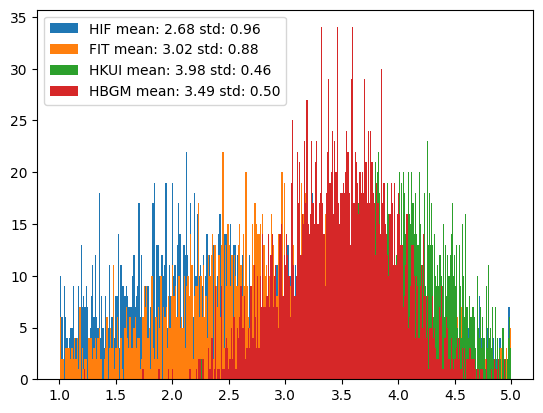

In [12]:
plt.hist(df.loc[HIF_idxs, 'avg_grade'], bins=350, label=f'HIF mean: {HIF_mean:.2f} std: {HIF_std:.2f}')
plt.hist(df.loc[FIT_idxs, 'avg_grade'], bins=350, label=f'FIT mean: {FIT_mean:.2f} std: {FIT_std:.2f}')
plt.hist(df.loc[HKUI_idxs, 'avg_grade'], bins=350, label=f'HKUI mean: {HKUI_mean:.2f} std: {HKUI_std:.2f}')
plt.hist(df.loc[HBGM_idxs, 'avg_grade'], bins=350, label=f'HBGM mean: {HBGM_mean:.2f} std: {HBGM_std:.2f}')
plt.legend(loc="upper left")